# Visualizing categorical data
In the relational plot tutorial we saw how to use different visual representations to show the relationship between multiple variables in a dataset. In the examples, we focused on cases where the main relationship was between two numerical variables. If one of the main variables is “categorical” (divided into discrete groups) it may be helpful to use a more specialized approach to visualization.

In seaborn, there are several different ways to visualize a relationship involving categorical data. Similar to the relationship between relplot() and either scatterplot() or lineplot(), there are two ways to make these plots. There are a number of axes-level functions for plotting categorical data in different ways and a figure-level interface, catplot(), that gives unified higher-level access to them.

It’s helpful to think of the different categorical plot kinds as belonging to three different families, which we’ll discuss in detail below. They are:

Categorical scatterplots:

stripplot() (with kind="strip"; the default)

swarmplot() (with kind="swarm")

Categorical distribution plots:

boxplot() (with kind="box")

violinplot() (with kind="violin")

boxenplot() (with kind="boxen")

Categorical estimate plots:

pointplot() (with kind="point")

barplot() (with kind="bar")

countplot() (with kind="count")

These families represent the data using different levels of granularity. When deciding which to use, you’ll have to think about the question that you want to answer. The unified API makes it easy to switch between different kinds and see your data from several perspectives.

In this tutorial, we’ll mostly focus on the figure-level interface, catplot(). Remember that this function is a higher-level interface each of the functions above, so we’ll reference them when we show each kind of plot, keeping the more verbose kind-specific API documentation at hand.

## Categorical scatterplots
The default representation of the data in catplot() uses a scatterplot. There are actually two different categorical scatter plots in seaborn. They take different approaches to resolving the main challenge in representing categorical data with a scatter plot, which is that all of the points belonging to one category would fall on the same position along the axis corresponding to the categorical variable. The approach used by stripplot(), which is the default “kind” in catplot() is to adjust the positions of points on the categorical axis with a small amount of random “jitter”

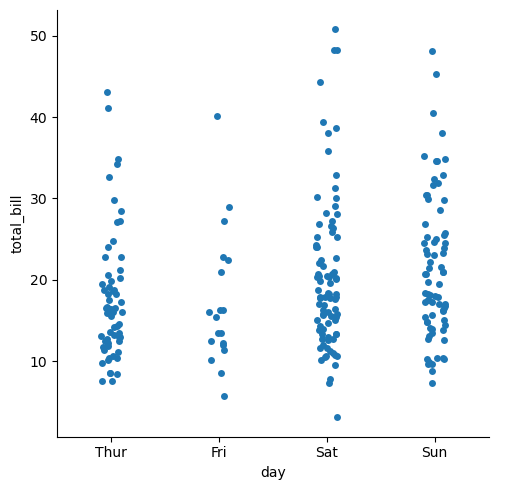

In [1]:
import seaborn as sns

tips = sns.load_dataset("tips")
sns.catplot(data=tips, x="day", y="total_bill")

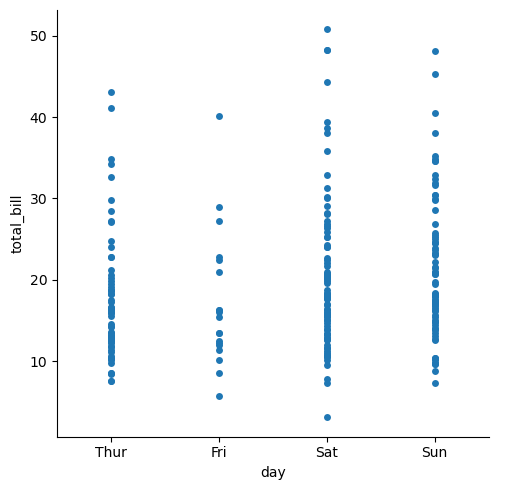

In [2]:
sns.catplot(data=tips, x="day", y="total_bill", jitter=False)

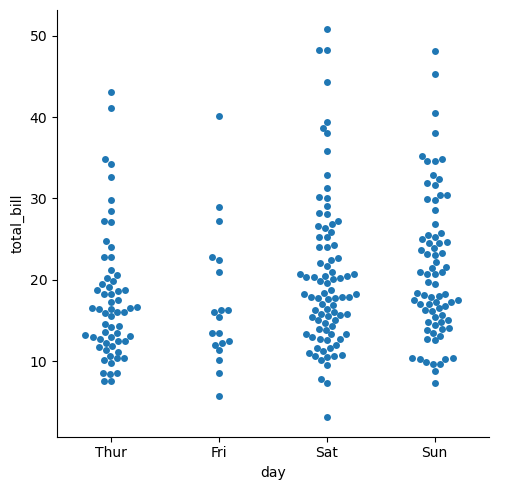

In [3]:
sns.catplot(data=tips, x="day", y="total_bill", kind="swarm")

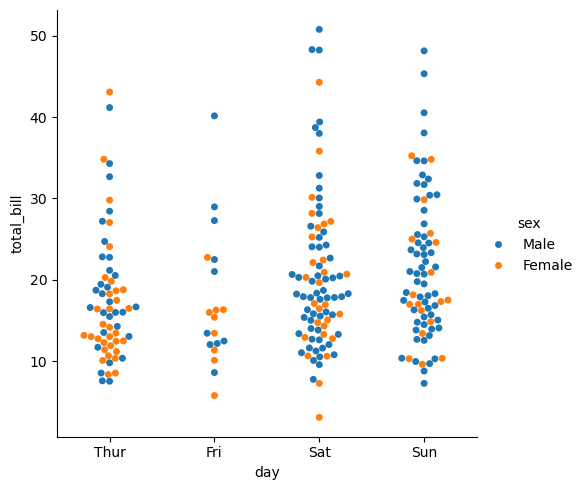

In [4]:
sns.catplot(data=tips, x="day", y="total_bill", hue="sex", kind="swarm")

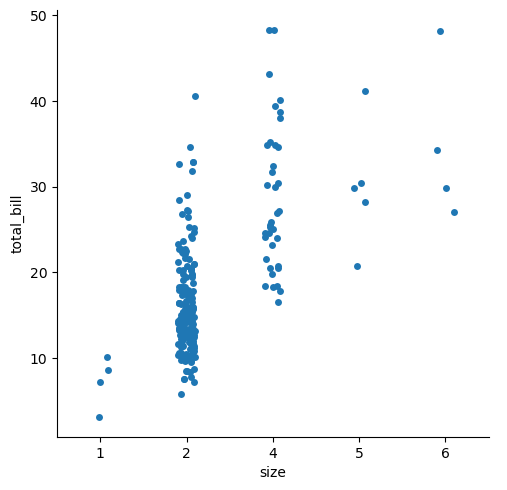

In [5]:
sns.catplot(data=tips.query("size != 3"), x="size", y="total_bill")

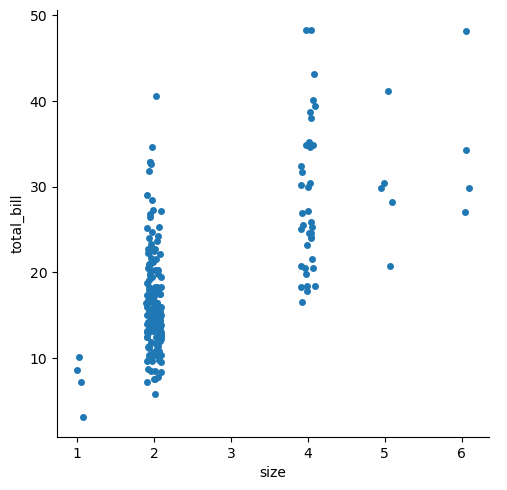

In [6]:
sns.catplot(data=tips.query("size != 3"), x="size", y="total_bill", native_scale=True)

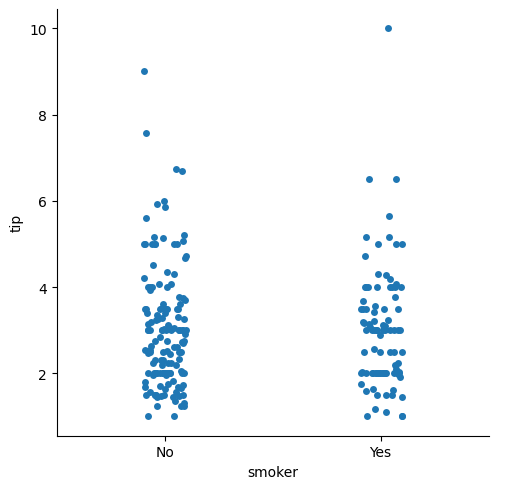

In [7]:
sns.catplot(data=tips, x="smoker", y="tip", order=["No", "Yes"])

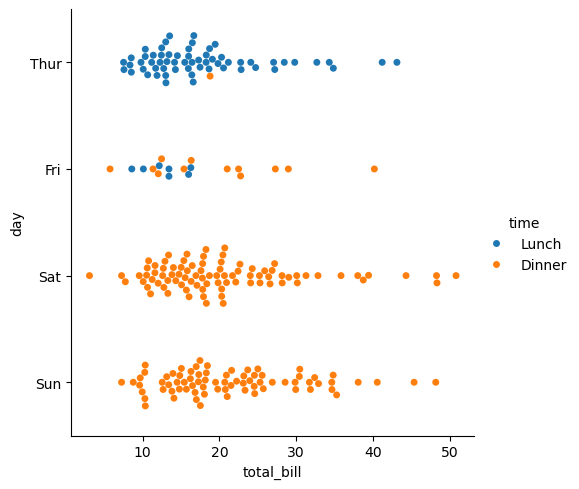

In [8]:
sns.catplot(data=tips, x="total_bill", y="day", hue="time", kind="swarm")

## Comparing distributions
As the size of the dataset grows, categorical scatter plots become limited in the information they can provide about the distribution of values within each category. When this happens, there are several approaches for summarizing the distributional information in ways that facilitate easy comparisons across the category levels.

### Boxplots
The first is the familiar boxplot(). This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data.

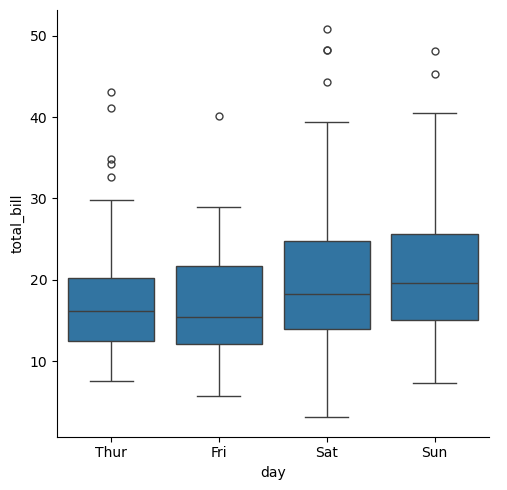

In [9]:
sns.catplot(data=tips, x="day", y="total_bill", kind="box")

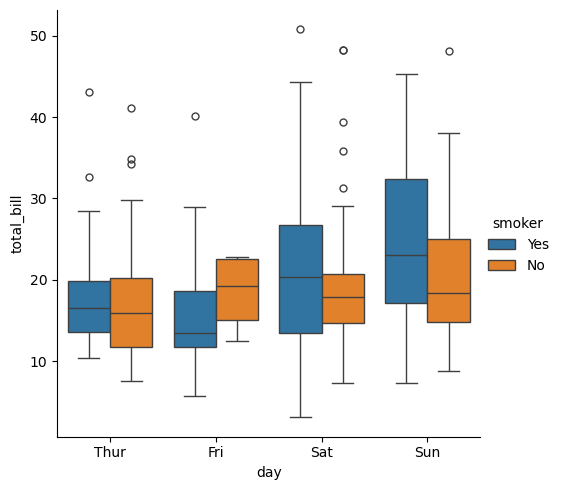

In [10]:
sns.catplot(data=tips, x="day", y="total_bill", hue="smoker", kind="box")

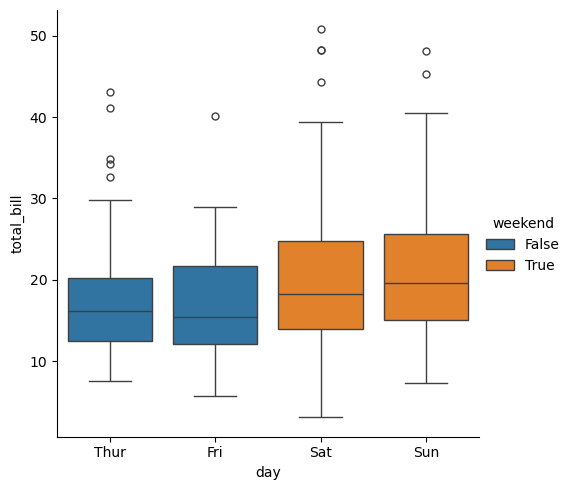

In [11]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(data=tips, x="day", y="total_bill", hue="weekend", kind="box")

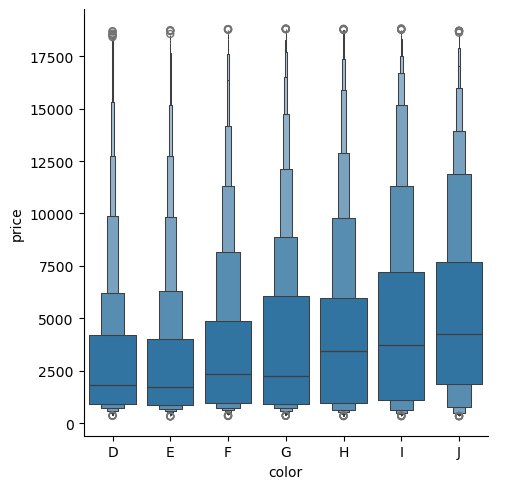

In [12]:
diamonds = sns.load_dataset("diamonds")
sns.catplot(
    data=diamonds.sort_values("color"),
    x="color", y="price", kind="boxen",
)

### Violinplots
A different approach is a violinplot(), which combines a boxplot with the kernel density estimation procedure described in the distributions tutorial

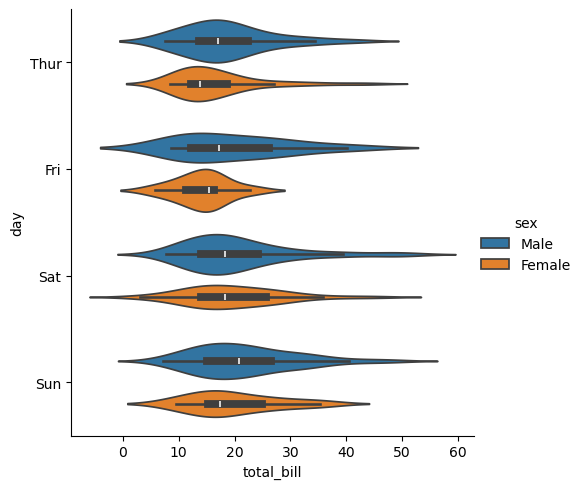

In [13]:
sns.catplot(
    data=tips, x="total_bill", y="day", hue="sex", kind="violin",
)

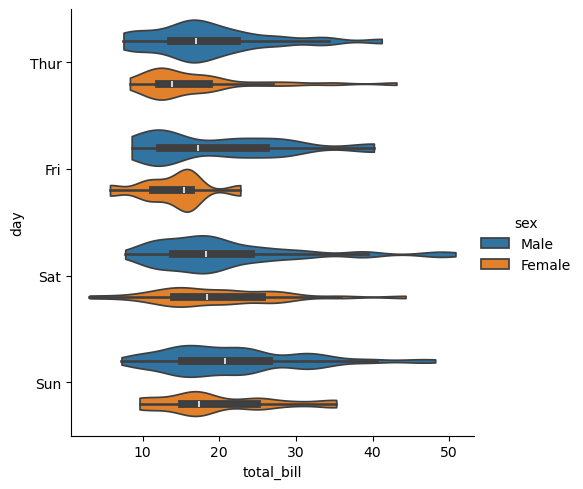

In [14]:
sns.catplot(
    data=tips, x="total_bill", y="day", hue="sex",
    kind="violin", bw_adjust=.5, cut=0,
)

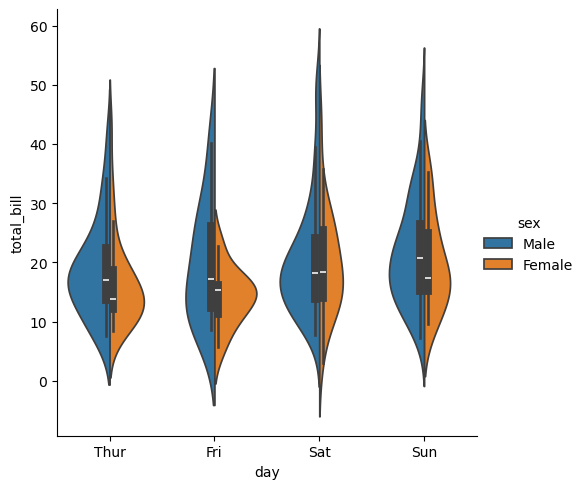

In [15]:
sns.catplot(
    data=tips, x="day", y="total_bill", hue="sex",
    kind="violin", split=True,
)

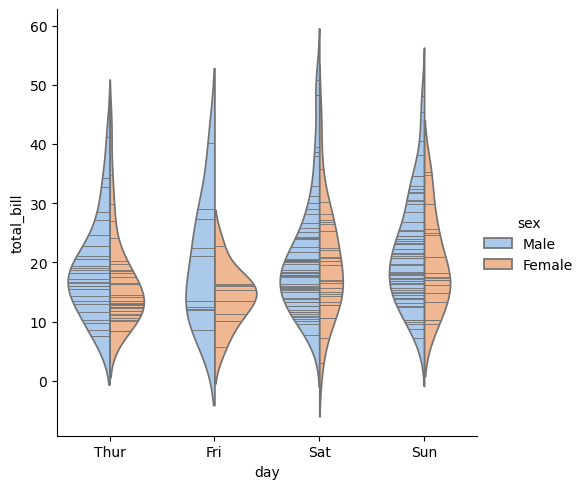

In [16]:
sns.catplot(
    data=tips, x="day", y="total_bill", hue="sex",
    kind="violin", inner="stick", split=True, palette="pastel",
)

<Axes: xlabel='day', ylabel='total_bill'>

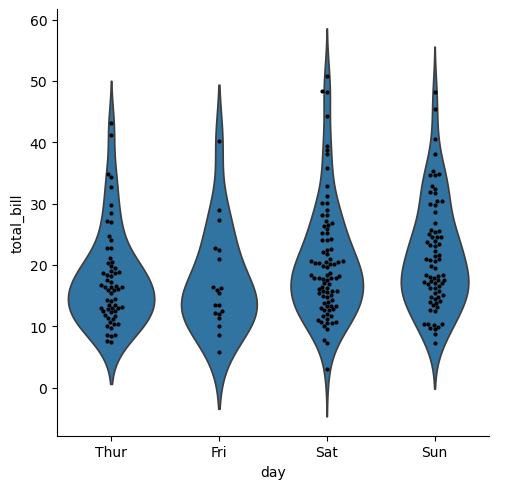

In [17]:
g = sns.catplot(data=tips, x="day", y="total_bill", kind="violin", inner=None)
sns.swarmplot(data=tips, x="day", y="total_bill", color="k", size=3, ax=g.ax)

## Estimating central tendency
For other applications, rather than showing the distribution within each category, you might want to show an estimate of the central tendency of the values. Seaborn has two main ways to show this information. Importantly, the basic API for these functions is identical to that for the ones discussed above.

### Bar plots
A familiar style of plot that accomplishes this goal is a bar plot. In seaborn, the barplot() function operates on a full dataset and applies a function to obtain the estimate (taking the mean by default). When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate, which is plotted using error bars

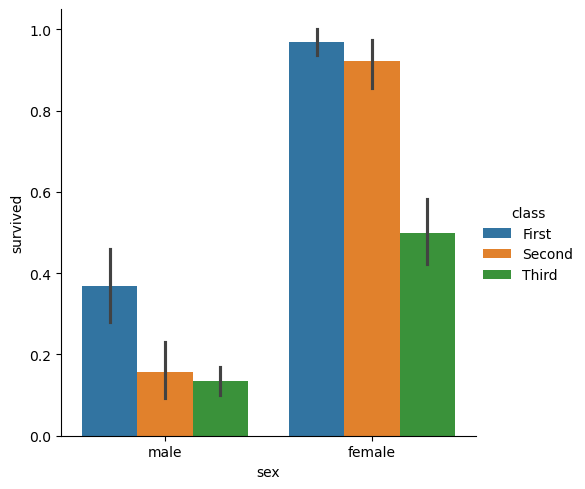

In [18]:
titanic = sns.load_dataset("titanic")
sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="bar")

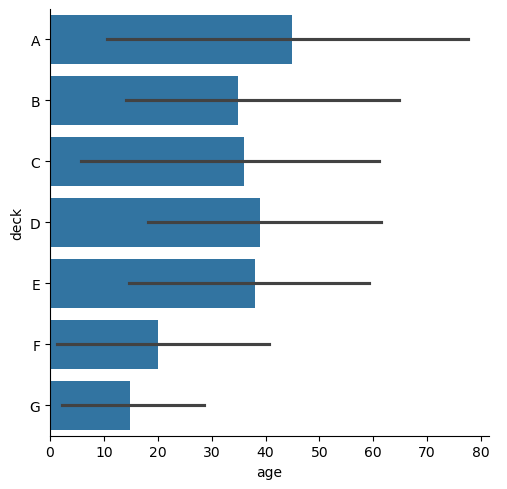

In [19]:
sns.catplot(data=titanic, x="age", y="deck", errorbar=("pi", 95), kind="bar")

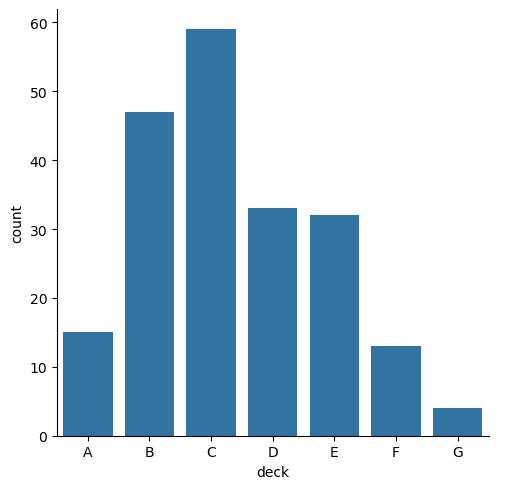

In [20]:
sns.catplot(data=titanic, x="deck", kind="count")

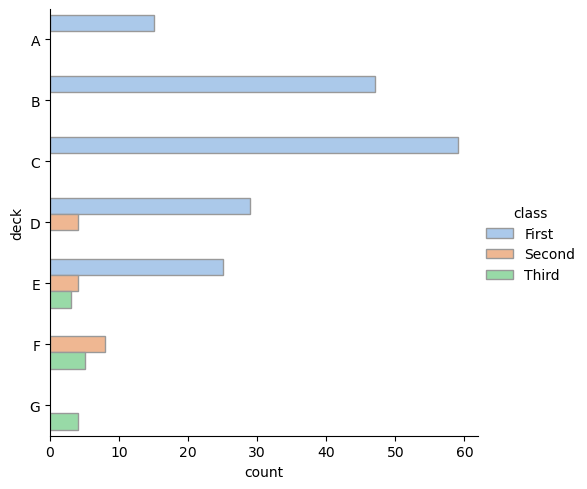

In [21]:
sns.catplot(
    data=titanic, y="deck", hue="class", kind="count",
    palette="pastel", edgecolor=".6",
)

### Point plots
An alternative style for visualizing the same information is offered by the pointplot() function. This function also encodes the value of the estimate with height on the other axis, but rather than showing a full bar, it plots the point estimate and confidence interval. Additionally, pointplot() connects points from the same hue category. This makes it easy to see how the main relationship is changing as a function of the hue semantic, because your eyes are quite good at picking up on differences of slopes

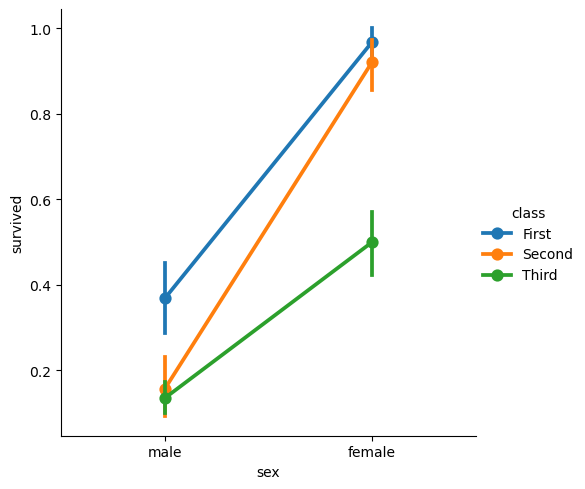

In [22]:
sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="point")

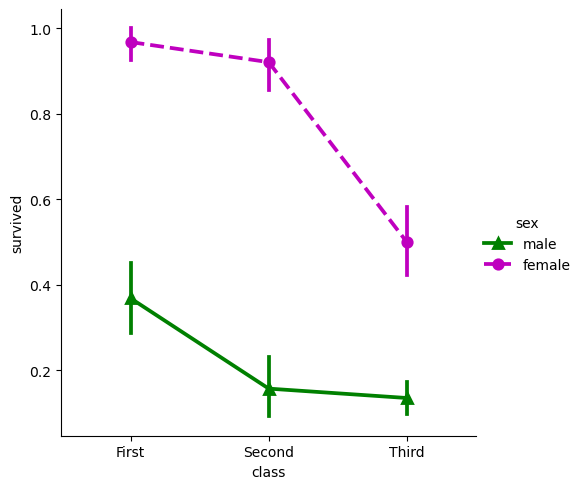

In [23]:
sns.catplot(
    data=titanic, x="class", y="survived", hue="sex",
    palette={"male": "g", "female": "m"},
    markers=["^", "o"], linestyles=["-", "--"],
    kind="point"
)

### Showing additional dimensions
Just like relplot(), the fact that catplot() is built on a FacetGrid means that it is easy to add faceting variables to visualize higher-dimensional relationships

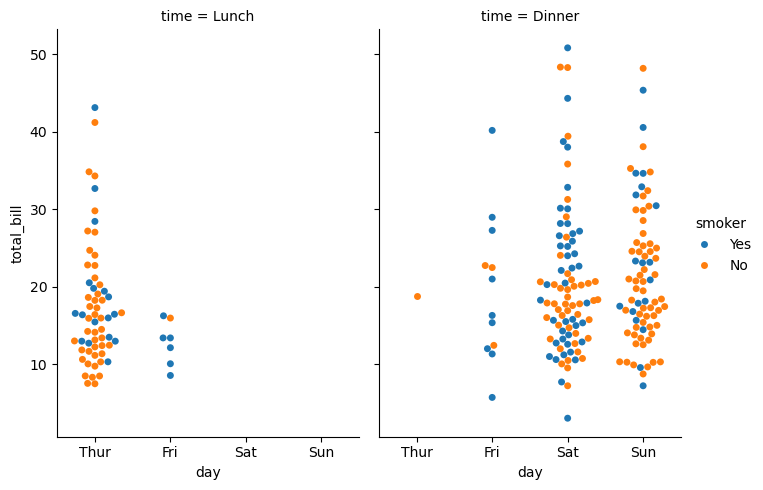

In [24]:
sns.catplot(
    data=tips, x="day", y="total_bill", hue="smoker",
    kind="swarm", col="time", aspect=.7,
)

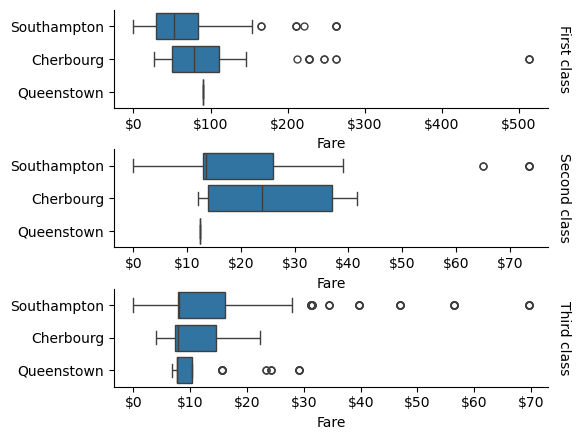

In [25]:
g = sns.catplot(
    data=titanic,
    x="fare", y="embark_town", row="class",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel="Fare", ylabel="")
g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('${x:.0f}')